In [1]:
import numpy as np
from scipy.optimize import golden, brute, bisect, minimize

In [2]:
from typing import Callable, Tuple, List
import pandas as pd

In [3]:
import random

In [4]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 22

In [5]:
EPS = 0.001

In [6]:
def plot_line(f: Callable[[float], float], ranges: Tuple[float, float], min_x: float, title: str):
    X = np.linspace(ranges[0][0], ranges[0][1], 1000)
    plt.plot(X, [f(x) for x in X])
    plt.plot([min_x], [f(min_x)], marker='o', markersize=3, color="red")  
    plt.title(title)
    plt.show()

In [7]:
def plot_scatter_with_trends(x: List[float], y: List[float], trends: List[Tuple[List[float], List[float], str]], title: str):
    plt.scatter(x, y, label="generated data")
    for x, y, label in trends:
        plt.plot(x, y, label=label)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

In [8]:
def brute_optimization(f: Callable[[float], float], ranges: List[Tuple[float, float]], tol: float) -> Tuple[float, int]:
    Ns = int(np.ceil((ranges[0][1] - ranges[0][0]) / tol))
    return brute(func=f, ranges=ranges, Ns=Ns, finish=None), 1

In [9]:
def dichotomy_optimization(f: Callable[[float], float], ranges: List[Tuple[float, float]], tol: float) -> Tuple[float, int]:
    a, b = ranges[0]
    delta = tol / 1000
    it = 0
    while (b - a) > tol:
        it += 1
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        
        if f(x1) <= f(x2):
            b = x2
        else:
            a = x1

    return a, it

In [10]:
GOLDEN_MEAN = 0.5 * (3.0 - 5.0 ** 0.5)

def golden_optimization(f: Callable[[float], float], ranges: List[Tuple[float, float]], tol: float) -> Tuple[float, int]:
    a, b = ranges[0]
    it = 0
    upd1, upd2 = True, True
    while (b - a) > tol:
        it += 1
        if upd1:
            x1 = a + (b - a) * GOLDEN_MEAN
            fx1 = f(x1)
        if upd2:
            x2 = b - (b - a) * GOLDEN_MEAN
            fx2 = f(x2)
        
        if fx1 <= fx2:
            b = x2
            x2, fx2 = x1, fx1
            upd1, upd2 = True, False
        else:
            a = x1
            x1, fx1 = x2, fx2
            upd1, upd2 = False, True

    return a, it

In [11]:
def gauss_optimization(f: Callable[[float], float], ranges: List[Tuple[float, float]], tol: float) -> Tuple[float, int]:
    x0 = [random.uniform(low, hight) for low, hight in ranges]
    res = minimize(method='Powell', fun=f, x0=x0, bounds=ranges, options={'direc': np.array([[0, 1], [1, 0]])}, tol=tol)
    return res.x, res.nit

In [12]:
def nedler_mead_optimization(f: Callable[[float], float], ranges: List[Tuple[float, float]], tol: float) -> Tuple[float, int]:
    x0 = [random.uniform(low, hight) for low, hight in ranges]
    res = minimize(method='Nelder-Mead', fun=f, x0=x0, bounds=ranges, tol=tol)
    return res.x, res.nit

In [13]:
methods = {'brute': brute_optimization,
           'dichotomy': dichotomy_optimization,
           'golden': golden_optimization,
           'gauss': gauss_optimization,
           'nelder-mead': nedler_mead_optimization,
          }

In [14]:
def run_f(f: Callable[[float], float], x: float, inv: List[int]) -> float:
    inv[0] += 1
    return f(x)

In [15]:
def run_optimization(method: str, f: Callable[[float], float], ranges: List[Tuple[float, float]], tol: float) -> Tuple[float, int, int]:
    inv = [0]
    optimizer = methods[method]
    opt, it = optimizer(lambda x: run_f(f, x, inv), ranges, tol)
    return opt, it, inv[0]

In [16]:
def minimize_one_dimensional_function(f: Callable[[float], float], f_ranges: List[Tuple[float, float]], f_min: float, f_name: str):
    results = []
    for method in ['brute', 'dichotomy', 'golden']:
        opt, it, inv = run_optimization(method, f, f_ranges, EPS)
        results.append([f'${f_name}$', method, f_ranges[0], opt, it, inv])
    df = pd.DataFrame.from_records(results, columns=['function', 'method', 'range', 'min', 'iteratins', 'invocations'])
    return df

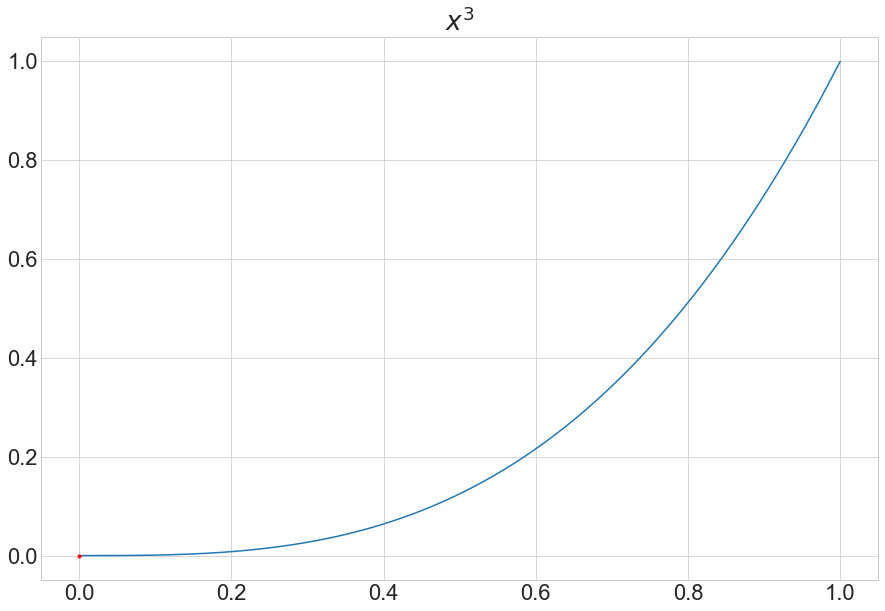

,function,method,range,min,iteratins,invocations
0,$$x^3$$,brute,"[0, 1]",0.0,1,1000
1,$$x^3$$,dichotomy,"[0, 1]",0.0,10,20
2,$$x^3$$,golden,"[0, 1]",0.0,15,16


In [17]:
def f1(x):
    return x ** 3

function = (f1, [[0, 1]], 0, '$x^3$')
plot_line(*function)
minimize_one_dimensional_function(*function)

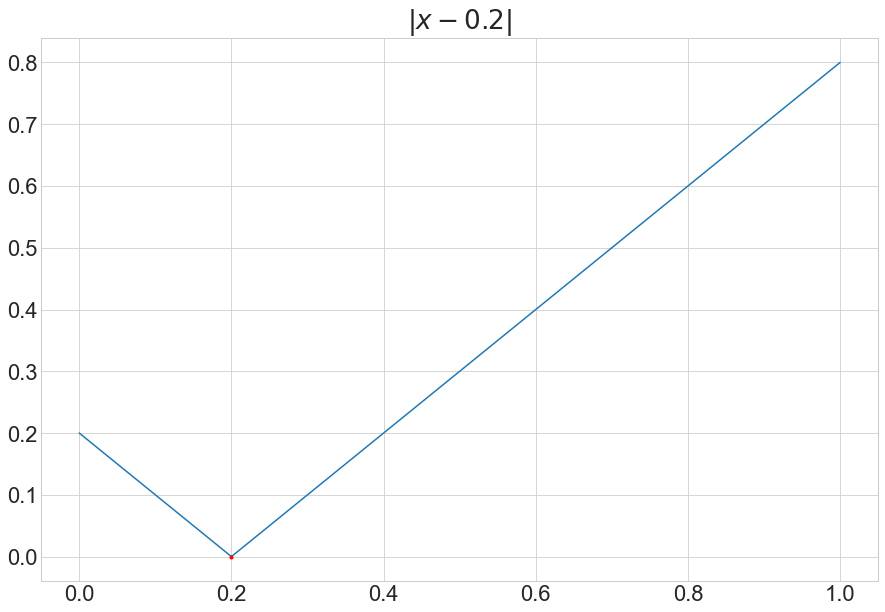

,function,method,range,min,iteratins,invocations
0,$$|x-0.2|$$,brute,"[0, 1]",0.200200,1,1000
1,$$|x-0.2|$$,dichotomy,"[0, 1]",0.199219,10,20
2,$$|x-0.2|$$,golden,"[0, 1]",0.199707,15,16


In [18]:
def f2(x): 
    return np.abs(x - 0.2)

function = (f2, [[0, 1]], 0.2, '$|x-0.2|$')
plot_line(*function)
minimize_one_dimensional_function(*function)

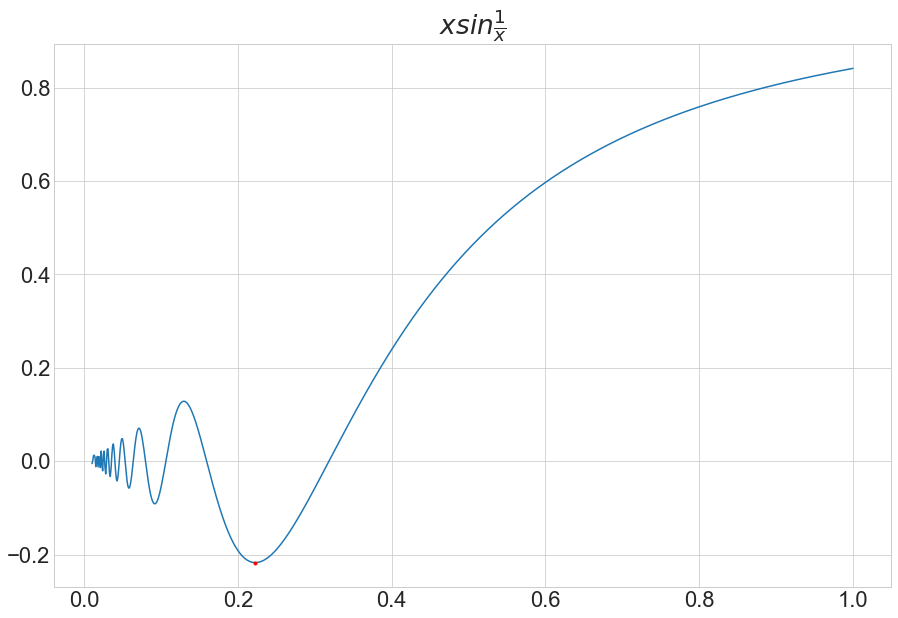

,function,method,range,min,iteratins,invocations
0,$$x sin\frac{1}{x}$$,brute,"[0.01, 1]",0.222214,1,990
1,$$x sin\frac{1}{x}$$,dichotomy,"[0.01, 1]",0.221728,10,20
2,$$x sin\frac{1}{x}$$,golden,"[0.01, 1]",0.222357,15,16


In [19]:
def f3(x): 
    return x * np.sin(1 / x)

function = (f3, [[0.01, 1]], 0.222548, r'$x sin\frac{1}{x}$')
plot_line(*function)
minimize_one_dimensional_function(*function)

In [20]:
N = 100
alpha, beta = random.uniform(0, 1), random.uniform(0, 1)
x = np.array([k / 100 for k in range(N)])
y = alpha * x + beta + np.random.normal(0, 0.1, N)

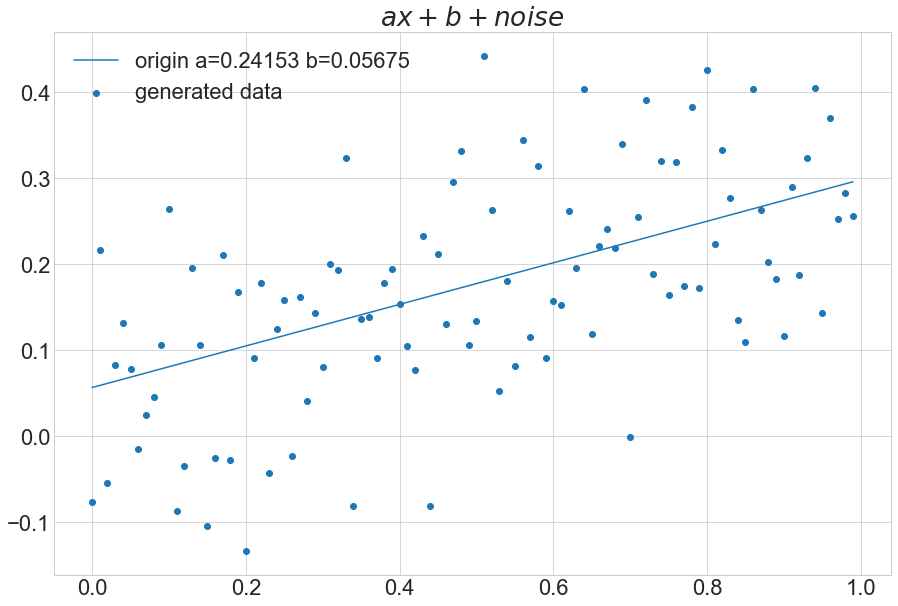

In [21]:
plot_scatter_with_trends(x, y, [(x, alpha * x + beta, "origin" + (" a=%.5f b=%.5f" % (alpha, beta)))], '$ax + b + noise$')

In [22]:
def d(f, a, b, x, y):
    return (np.square(f(x, a, b) - y)).mean(axis=0)

In [23]:
def minimize_multidimensional_function(f_: Callable[[float, float, float], float], f_ranges: List[Tuple[float, float]], f_name: str) -> pd.DataFrame:
    results = []
    f = lambda p: d(f_, p[0], p[1], x, y)
    trends = [(x, alpha * x + beta, "origin")]
    for method in ['brute', 'gauss', 'nelder-mead']:
        opt, it, inv = run_optimization(method, f, f_ranges, EPS)
        mse = d(f_, opt[0], opt[1], x, y)
        results.append([f'${f_name}$', method, f_ranges, np.around(opt, 5), mse, it, inv])
        trends.append((x, f_(x, opt[0], opt[1]), method))
    plot_scatter_with_trends(x, y, trends, f_name)
    df = pd.DataFrame.from_records(results, columns=['function', 'method', 'range', '[a, b]', 'mse', 'iteratins', 'invocations'])
    return df

/usr/local/lib/python3.9/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


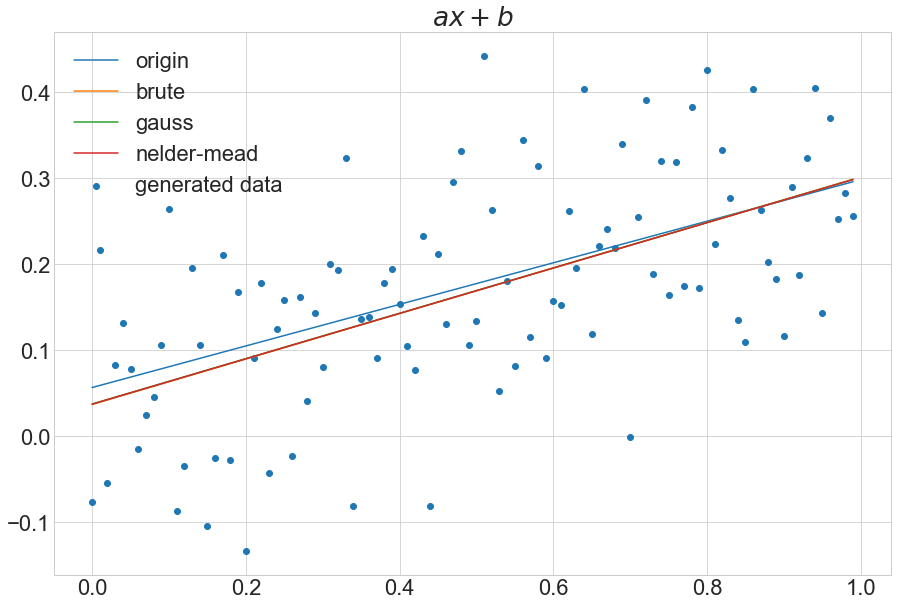

,function,method,range,"[a, b]",mse,iteratins,invocations
0,$$ax + b$$,brute,"[[0, 1], [0, 1]]","[0.26426, 0.03704]",0.011217,1,1000000
1,$$ax + b$$,gauss,"[[0, 1], [0, 1]]","[0.26358, 0.03759]",0.011217,3,59
2,$$ax + b$$,nelder-mead,"[[0, 1], [0, 1]]","[0.26357, 0.03741]",0.011217,36,69


In [24]:
def f4(x, a, b):
    return a * x + b

functin = (f4, [[0, 1], [0, 1]], '$ax + b$')
minimize_multidimensional_function(*functin)

/usr/local/lib/python3.9/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


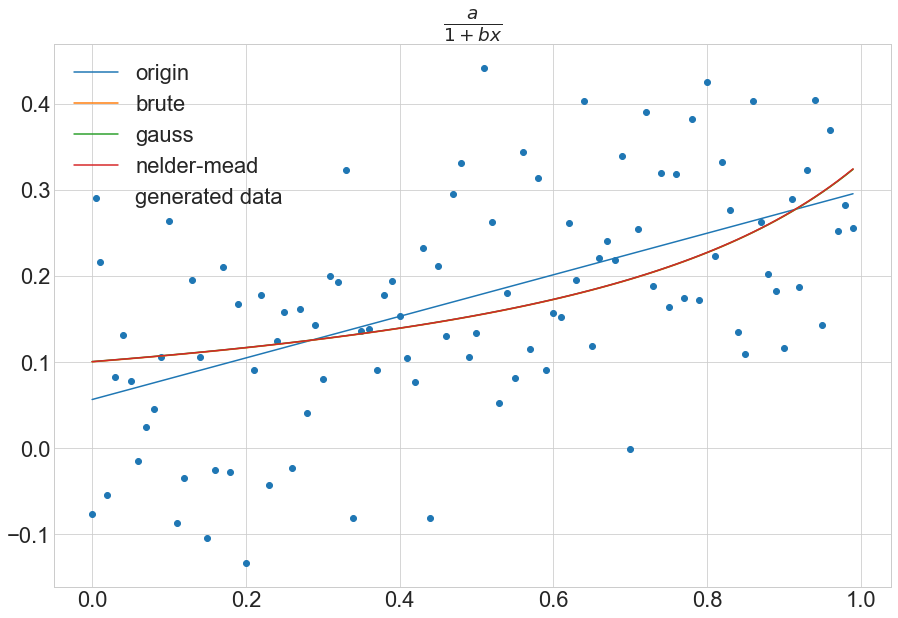

,function,method,range,"[a, b]",mse,iteratins,invocations
0,$$\frac{a}{1 + bx}$$,brute,"[[-1, 1], [-1, 1]]","[0.10055, -0.69685]",0.012296,1,4000000
1,$$\frac{a}{1 + bx}$$,gauss,"[[-1, 1], [-1, 1]]","[0.10083, -0.69602]",0.012296,8,226
2,$$\frac{a}{1 + bx}$$,nelder-mead,"[[-1, 1], [-1, 1]]","[0.10076, -0.69676]",0.012296,40,77


In [25]:
def f5(x, a, b):
    return a / (1 + x * b)

fuction = (f5, [[-1, 1], [-1, 1]], r'$\frac{a}{1 + bx}$')
minimize_multidimensional_function(*fuction)